## Import Libraries

In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.4 MB/s eta 0:00:00


In [ ]:
# Dataframe
import numpy as np
import pandas as pd

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Mount my Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Files

In [ ]:
# Upload Sentiment_Code file from Drive
code_path = "/content/drive/My Drive/2. MSBA/Module 5/MSBA 512/Data/My Files/charge_codes.csv"
df = pd.read_csv(code_path)

## Cluster 1 - First Digit Classifier

In [ ]:
df.head(5)

,Unnamed: 0,ACCESSORIAL_CHARGE_CODE,Count,ACCESSORIAL_CHARGE_DESCRIPTION
0,0,FS,128128,FUEL SURCHARGE
1,1,BR,21290,CUSTOM BROKERAGE CHARGE
2,2,MS,19033,MSC CHRGS
3,3,HA,14551,HANDLING
4,4,PC,10135,PICK UP


In [ ]:
# Drop column 'Unnamed:0'
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head(5)

,ACCESSORIAL_CHARGE_CODE,Count,ACCESSORIAL_CHARGE_DESCRIPTION
0,FS,128128,FUEL SURCHARGE
1,BR,21290,CUSTOM BROKERAGE CHARGE
2,MS,19033,MSC CHRGS
3,HA,14551,HANDLING
4,PC,10135,PICK UP


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ACCESSORIAL_CHARGE_CODE         138 non-null    object
 1   Count                           138 non-null    int64 
 2   ACCESSORIAL_CHARGE_DESCRIPTION  138 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.4+ KB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


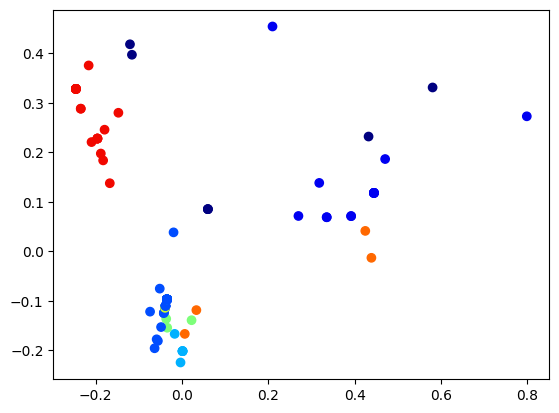

    ACCESSORIAL_CHARGE_CODE   Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster
0                        FS  128128                 FUEL SURCHARGE        2
1                        BR   21290        CUSTOM BROKERAGE CHARGE        1
2                        MS   19033                      MSC CHRGS        2
3                        HA   14551                       HANDLING        2
4                        PC   10135                        PICK UP        8
..                      ...     ...                            ...      ...
133                      BW       1      BANK CHARGE/WIRE TRANSFER        1
134                      EV       1               EXCESS VALUE FEE        9
135                      MI       1                         MILAGE        2
136                      BU       1                       BUNDLING        2
137                      WS       1          WEEKLY SERVICE CHARGE        0

[138 rows x 4 columns]
Cluster Centers:
                       0         1         2   

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Use TfidfVectorizer to convert the text descriptions into numerical features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['ACCESSORIAL_CHARGE_DESCRIPTION'].astype(str))  # Ensure the column is treated as string

# Use KMeans clustering
num_clusters = 10  # You can adjust this number based on your preference
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (optional)
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X.toarray())
colors = [plt.cm.jet(i / num_clusters) for i in df['Cluster']]
plt.scatter(scatter_plot_points[:, 0], scatter_plot_points[:, 1], c=colors, marker='o')
plt.show()

# Display the DataFrame with the cluster assignments
print(df[['ACCESSORIAL_CHARGE_CODE', 'Count', 'ACCESSORIAL_CHARGE_DESCRIPTION', 'Cluster']])

# Print cluster information after fitting the KMeans model
print("Cluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=vectorizer.get_feature_names_out()).transpose())

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Assuming 'df' is your DataFrame
# Use TfidfVectorizer to convert the text descriptions into numerical features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['ACCESSORIAL_CHARGE_DESCRIPTION'].astype(str))  # Ensure the column is treated as string

# Use KMeans clustering
num_clusters = 10  # You can adjust this number based on your preference
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Display the DataFrame with the cluster assignments
result_df = df[['ACCESSORIAL_CHARGE_CODE', 'Count', 'ACCESSORIAL_CHARGE_DESCRIPTION', 'Cluster']]

# List out the top terms for each cluster
cluster_centers = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

cluster_terms = {}
for i in range(num_clusters):
    top_terms = [terms[ind] for ind in cluster_centers[i, :20]]  # Change 5 to the number of top terms you want to display
    cluster_terms[f'Cluster {i+1}'] = top_terms

# Display the DataFrame with the cluster assignments
print(result_df)

# Display cluster terms
for cluster, terms in cluster_terms.items():
    print(f"{cluster}: {', '.join(terms)}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    ACCESSORIAL_CHARGE_CODE   Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster
0                        FS  128128                 FUEL SURCHARGE        2
1                        BR   21290        CUSTOM BROKERAGE CHARGE        1
2                        MS   19033                      MSC CHRGS        2
3                        HA   14551                       HANDLING        2
4                        PC   10135                        PICK UP        8
..                      ...     ...                            ...      ...
133                      BW       1      BANK CHARGE/WIRE TRANSFER        1
134                      EV       1               EXCESS VALUE FEE        9
135                      MI       1                         MILAGE        2
136                      BU       1                       BUNDLING        2
137                      WS       1          WEEKLY SERVICE CHARGE        0

[138 rows x 4 columns]
Cluster 1: service, charge, messenger, curier, terminal, fee, ag

In [ ]:
# Assuming 'df' is your DataFrame
cluster_counts = df['Cluster'].value_counts()

# Display the count of items in each cluster
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
2    76
9    23
1    15
0     7
3     6
8     4
5     3
6     2
7     1
4     1
Name: Cluster, dtype: int64


In [ ]:
# Assuming 'df' is your DataFrame
num_clusters = 10  # or the number of clusters you used in the previous clustering

# Print descriptions for each cluster
for cluster_num in range(num_clusters):
    cluster_df = df[df['Cluster'] == cluster_num]
    descriptions = cluster_df['ACCESSORIAL_CHARGE_DESCRIPTION'].tolist()

    print(f"\nCluster {cluster_num + 1} Descriptions:")
    for description in descriptions:
        print(f"- {description}")


Cluster 1 Descriptions:
- TERMINAL SERVICE
- CURIER SERVICE
- IMPORT SERVICE FEE
- MESSENGER SERVICE
- SERVICE CHARGE
- AGILITY SERVICE FEE
- WEEKLY SERVICE CHARGE

Cluster 2 Descriptions:
- CUSTOM BROKERAGE CHARGE
- SECURITY CHARGE
- OVER DIEM CHARGE
- FORKLIFT CHARGE
- MEXICAN OUTBOUND CHARGE
- MEXICAN OB CHARGE
- PALLET CHARGE
- BOND FEE/CHARGE
- WAREHOUSE CHARGE
- BEYOND CHARGE
- ADJUSTMENT FOR MIN CHARGE
- VALUATION CHARGE
- FOREIGN SHIP CHARGE
- X-RAY CHARGE
- BANK CHARGE/WIRE TRANSFER

Cluster 3 Descriptions:
- FUEL SURCHARGE
- MSC CHRGS
- HANDLING
- DUTY CHARGES
- MANIFEST
- WEIGHT VERIFICATION
- TARP
- EXTRA COPIES MAILING
- STORAGE
- DUTY ADVANCE
- DETENTION
- EXPORT/DOMESTIC PACKING
- LOADING/UNLOADING
- CUSTOMS DUTY
- OD PERMITS
- STOP OFF
- INLAND FREIGHT
- BILL OF LADING
- DRAYAGE
- FOB
- CARTAGE
- REDELIVERY
- COLLECT SURCHARGE
- IMPORT SECURITY FILING
- PIER PASS
- NON-CONFORMING CARGO
- EXPORT DECLARATION
- EQUIPMENT ORDER NOT USED
- GURAENTEED DELIEVERY
- RECONSIGNME

In [ ]:
# Assuming 'df' is your DataFrame

# Create a new column 'Combined_Code' based on the specified format
df['Combined_Code'] = df['Cluster'].astype(str).str.zfill(1) + df['ACCESSORIAL_CHARGE_CODE']

# Display the DataFrame with the new 'Combined_Code' column
print(df[['ACCESSORIAL_CHARGE_CODE', 'Count', 'ACCESSORIAL_CHARGE_DESCRIPTION', 'Cluster', 'Combined_Code']])

    ACCESSORIAL_CHARGE_CODE   Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
0                        FS  128128                 FUEL SURCHARGE        2   
1                        BR   21290        CUSTOM BROKERAGE CHARGE        1   
2                        MS   19033                      MSC CHRGS        2   
3                        HA   14551                       HANDLING        2   
4                        PC   10135                        PICK UP        8   
..                      ...     ...                            ...      ...   
133                      BW       1      BANK CHARGE/WIRE TRANSFER        1   
134                      EV       1               EXCESS VALUE FEE        9   
135                      MI       1                         MILAGE        2   
136                      BU       1                       BUNDLING        2   
137                      WS       1          WEEKLY SERVICE CHARGE        0   

    Combined_Code  
0             2FS  
1          

In [ ]:
df.head(10)

,ACCESSORIAL_CHARGE_CODE,Count,ACCESSORIAL_CHARGE_DESCRIPTION,Cluster,Combined_Code
0,FS,128128,FUEL SURCHARGE,2,2FS
1,BR,21290,CUSTOM BROKERAGE CHARGE,1,1BR
2,MS,19033,MSC CHRGS,2,2MS
3,HA,14551,HANDLING,2,2HA
4,PC,10135,PICK UP,8,8PC
5,DU,9265,DUTY CHARGES,2,2DU
6,TH,7685,TERMINAL SERVICE,0,0TH
7,PF,7010,PROCESSING FEE/MERCHANDISE,9,9PF
8,MN,6112,MANIFEST,2,2MN
9,WV,5199,WEIGHT VERIFICATION,2,2WV


## Cluster 2 - Second Digit Classifier

In [ ]:
# repeat another cluster analysis for each group of clusters to determine the second digit in the 3 digit code

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Assuming 'df' is your DataFrame

# Specify the maximum number of sub-clusters
max_sub_clusters = 10

# Loop through each main cluster
for main_cluster in range(10):
    # Select data points from the current main cluster
    main_cluster_data = df[df['Cluster'] == main_cluster]

    # Check the number of samples in the main cluster
    num_samples = len(main_cluster_data)

    # Determine the number of sub-clusters based on the available samples
    num_sub_clusters = min(max_sub_clusters, num_samples)

    if num_samples >= 1:  # Ensure there are enough samples to perform clustering
        # Apply a new clustering analysis to the selected data points
        sub_cluster_vectorizer = TfidfVectorizer(stop_words='english')
        sub_cluster_X = sub_cluster_vectorizer.fit_transform(main_cluster_data['ACCESSORIAL_CHARGE_DESCRIPTION'].astype(str))

        # Use KMeans to create sub-clusters
        sub_kmeans = KMeans(n_clusters=num_sub_clusters, random_state=42)
        main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)

        # Combine the main 'Cluster' and new 'Sub_Cluster' to create a hierarchical label
        main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']

        # Display the DataFrame with the new hierarchical clustering information for the current main cluster
        print(f"\nMain Cluster {main_cluster + 1} Sub-Clusters:")
        print(main_cluster_data[['ACCESSORIAL_CHARGE_CODE', 'Count', 'ACCESSORIAL_CHARGE_DESCRIPTION', 'Cluster', 'Sub_Cluster', 'Hierarchical_Cluster']])
    else:
        print(f"\nMain Cluster {main_cluster + 1} has insufficient samples for clustering.")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-16-7a18f4af31ae>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-16-7a18f4af31ae>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] 


Main Cluster 1 Sub-Clusters:
    ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
6                        TH   7685               TERMINAL SERVICE        0   
27                       CR    792                 CURIER SERVICE        0   
47                       IS    235             IMPORT SERVICE FEE        0   
63                       ME     77              MESSENGER SERVICE        0   
77                       SV     30                 SERVICE CHARGE        0   
110                      AG      6            AGILITY SERVICE FEE        0   
137                      WS      1          WEEKLY SERVICE CHARGE        0   

     Sub_Cluster  Hierarchical_Cluster  
6              1                     1  
27             4                     4  
47             2                     2  
63             3                     3  
77             6                     6  
110            5                     5  
137            0                     0  


<ipython-input-16-7a18f4af31ae>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-16-7a18f4af31ae>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini


Main Cluster 2 Sub-Clusters:
    ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
1                        BR  21290        CUSTOM BROKERAGE CHARGE        1   
15                       SU   2981                SECURITY CHARGE        1   
36                       OV    430               OVER DIEM CHARGE        1   
76                       FK     31                FORKLIFT CHARGE        1   
83                       MO     22        MEXICAN OUTBOUND CHARGE        1   
85                       MX     20              MEXICAN OB CHARGE        1   
88                       PL     17                  PALLET CHARGE        1   
101                      BN     10                BOND FEE/CHARGE        1   
108                      WA      6               WAREHOUSE CHARGE        1   
111                      BC      6                  BEYOND CHARGE        1   
123                      AN      2      ADJUSTMENT FOR MIN CHARGE        1   
124                      VC      2

<ipython-input-16-7a18f4af31ae>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-16-7a18f4af31ae>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini


Main Cluster 3 Sub-Clusters:
    ACCESSORIAL_CHARGE_CODE   Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
0                        FS  128128                 FUEL SURCHARGE        2   
2                        MS   19033                      MSC CHRGS        2   
3                        HA   14551                       HANDLING        2   
5                        DU    9265                   DUTY CHARGES        2   
8                        MN    6112                       MANIFEST        2   
..                      ...     ...                            ...      ...   
127                      NO       1      NOTARY/ORIGIN CIRTIFICATE        2   
128                      BA       1                    BAD ADDRESS        2   
131                      BT       1                        BOBTAIL        2   
135                      MI       1                         MILAGE        2   
136                      BU       1                       BUNDLING        2   

     Sub_Cluster  Hie

<ipython-input-16-7a18f4af31ae>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-16-7a18f4af31ae>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini


Main Cluster 4 Sub-Clusters:
    ACCESSORIAL_CHARGE_CODE  Count  ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
22                       OL   1137            OUT OF AREA DELIVERY        3   
33                       OD    525  OVERSIZE DELIVERY/OVER DIM CHG        3   
46                       LG    259               LIFTGATE DELIVERY        3   
66                       SF     59        SPECIAL DELIVERY/M-F DAT        3   
99                       DP     10                DELIVERY ATTEMPT        3   
106                      AH      7            AFTER HOURS DELIVERY        3   

     Sub_Cluster  Hierarchical_Cluster  
22             2                    32  
33             4                    34  
46             5                    35  
66             0                    30  
99             3                    33  
106            1                    31  


<ipython-input-16-7a18f4af31ae>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-16-7a18f4af31ae>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini


Main Cluster 5 Sub-Clusters:
    ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
122                      MD      2                            MDF        4   

     Sub_Cluster  Hierarchical_Cluster  
122            0                    40  


<ipython-input-16-7a18f4af31ae>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-16-7a18f4af31ae>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini


Main Cluster 6 Sub-Clusters:
   ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
69                      TO     53                BORDER CROSSING        5   
79                      MB     27        MEXICAN BORDER CROSSING        5   
82                      CB     22                   CROSS BORDER        5   

    Sub_Cluster  Hierarchical_Cluster  
69            2                    52  
79            1                    51  
82            0                    50  


<ipython-input-16-7a18f4af31ae>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-16-7a18f4af31ae>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini


Main Cluster 7 Sub-Clusters:
    ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
90                       PT     14                   PREMIUM TIME        6   
112                      TE      5                  TIME DEFINITE        6   

     Sub_Cluster  Hierarchical_Cluster  
90             0                    60  
112            1                    61  

Main Cluster 8 Sub-Clusters:
   ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
94                      EX     11             EXPEDITED SERVICES        7   

    Sub_Cluster  Hierarchical_Cluster  
94            0                    70  


<ipython-input-16-7a18f4af31ae>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-16-7a18f4af31ae>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini


Main Cluster 9 Sub-Clusters:
   ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
4                       PC  10135                        PICK UP        8   
12                      DH   3891          DELIVERY CHARGE POINT        8   
52                      HN    157        SPECIAL PICK UP/M-F DAT        8   
97                      CF     10           PICK UP CHARGE POINT        8   

    Sub_Cluster  Hierarchical_Cluster  
4             2                    82  
12            3                    83  
52            0                    80  
97            1                    81  

Main Cluster 10 Sub-Clusters:
    ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
7                        PF   7010     PROCESSING FEE/MERCHANDISE        9   
13                       AM   3426             ADMINISTRATION FEE        9   
14                       TF   3171           AIRPORT TRANSFER FEE        9   
17                       HZ   1972       

<ipython-input-16-7a18f4af31ae>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-16-7a18f4af31ae>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Assuming 'df' is your DataFrame

# Specify the maximum number of sub-clusters
max_sub_clusters = 10

# Create variables to store the counts
total_cluster_count = 0
total_sub_cluster_count = 0

# Loop through each main cluster
for main_cluster in range(10):
    # Select data points from the current main cluster
    main_cluster_data = df[df['Cluster'] == main_cluster]

    # Check the number of samples in the main cluster
    num_samples = len(main_cluster_data)

    # Determine the number of sub-clusters based on the available samples
    num_sub_clusters = min(max_sub_clusters, num_samples)

    if num_samples >= 1:  # Ensure there are enough samples to perform clustering
        # Apply a new clustering analysis to the selected data points
        sub_cluster_vectorizer = TfidfVectorizer(stop_words='english')
        sub_cluster_X = sub_cluster_vectorizer.fit_transform(main_cluster_data['ACCESSORIAL_CHARGE_DESCRIPTION'].astype(str))

        # Use KMeans to create sub-clusters
        sub_kmeans = KMeans(n_clusters=num_sub_clusters, random_state=42)
        main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)

        # Combine the main 'Cluster' and new 'Sub_Cluster' to create a hierarchical label
        main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']

        # Display the count of items in each sub-cluster
        sub_cluster_count = main_cluster_data['Sub_Cluster'].value_counts()
        print(f"\nMain Cluster {main_cluster + 1} Sub-Cluster Counts:")
        print(sub_cluster_count)

        # Increment the total sub-cluster count
        total_sub_cluster_count += len(sub_cluster_count)

        # Display the DataFrame with the new hierarchical clustering information for the current main cluster
        print(f"\nMain Cluster {main_cluster + 1} Sub-Clusters:")
        print(main_cluster_data[['ACCESSORIAL_CHARGE_CODE', 'Count', 'ACCESSORIAL_CHARGE_DESCRIPTION', 'Cluster', 'Sub_Cluster', 'Hierarchical_Cluster']])
    else:
        print(f"\nMain Cluster {main_cluster + 1} has insufficient samples for clustering.")

    # Increment the total cluster count
    total_cluster_count += num_samples

# Display the total counts
print("\nTotal Main Cluster Count:", total_cluster_count)
print("Total Sub-Cluster Count:", total_sub_cluster_count)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-17-8c90a0517434>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-17-8c90a0517434>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] 


Main Cluster 1 Sub-Cluster Counts:
1    1
4    1
2    1
3    1
6    1
5    1
0    1
Name: Sub_Cluster, dtype: int64

Main Cluster 1 Sub-Clusters:
    ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
6                        TH   7685               TERMINAL SERVICE        0   
27                       CR    792                 CURIER SERVICE        0   
47                       IS    235             IMPORT SERVICE FEE        0   
63                       ME     77              MESSENGER SERVICE        0   
77                       SV     30                 SERVICE CHARGE        0   
110                      AG      6            AGILITY SERVICE FEE        0   
137                      WS      1          WEEKLY SERVICE CHARGE        0   

     Sub_Cluster  Hierarchical_Cluster  
6              1                     1  
27             4                     4  
47             2                     2  
63             3                     3  
77             6       

<ipython-input-17-8c90a0517434>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-17-8c90a0517434>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini


Main Cluster 2 Sub-Cluster Counts:
2    5
3    2
6    1
1    1
8    1
0    1
4    1
9    1
7    1
5    1
Name: Sub_Cluster, dtype: int64

Main Cluster 2 Sub-Clusters:
    ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
1                        BR  21290        CUSTOM BROKERAGE CHARGE        1   
15                       SU   2981                SECURITY CHARGE        1   
36                       OV    430               OVER DIEM CHARGE        1   
76                       FK     31                FORKLIFT CHARGE        1   
83                       MO     22        MEXICAN OUTBOUND CHARGE        1   
85                       MX     20              MEXICAN OB CHARGE        1   
88                       PL     17                  PALLET CHARGE        1   
101                      BN     10                BOND FEE/CHARGE        1   
108                      WA      6               WAREHOUSE CHARGE        1   
111                      BC      6                  

<ipython-input-17-8c90a0517434>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-17-8c90a0517434>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini


Main Cluster 3 Sub-Cluster Counts:
0    60
5     4
1     2
2     2
6     2
3     2
4     1
8     1
7     1
9     1
Name: Sub_Cluster, dtype: int64

Main Cluster 3 Sub-Clusters:
    ACCESSORIAL_CHARGE_CODE   Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
0                        FS  128128                 FUEL SURCHARGE        2   
2                        MS   19033                      MSC CHRGS        2   
3                        HA   14551                       HANDLING        2   
5                        DU    9265                   DUTY CHARGES        2   
8                        MN    6112                       MANIFEST        2   
..                      ...     ...                            ...      ...   
127                      NO       1      NOTARY/ORIGIN CIRTIFICATE        2   
128                      BA       1                    BAD ADDRESS        2   
131                      BT       1                        BOBTAIL        2   
135                      MI     

<ipython-input-17-8c90a0517434>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-17-8c90a0517434>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini


Main Cluster 4 Sub-Cluster Counts:
2    1
4    1
5    1
0    1
3    1
1    1
Name: Sub_Cluster, dtype: int64

Main Cluster 4 Sub-Clusters:
    ACCESSORIAL_CHARGE_CODE  Count  ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
22                       OL   1137            OUT OF AREA DELIVERY        3   
33                       OD    525  OVERSIZE DELIVERY/OVER DIM CHG        3   
46                       LG    259               LIFTGATE DELIVERY        3   
66                       SF     59        SPECIAL DELIVERY/M-F DAT        3   
99                       DP     10                DELIVERY ATTEMPT        3   
106                      AH      7            AFTER HOURS DELIVERY        3   

     Sub_Cluster  Hierarchical_Cluster  
22             2                    32  
33             4                    34  
46             5                    35  
66             0                    30  
99             3                    33  
106            1                    31  


<ipython-input-17-8c90a0517434>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-17-8c90a0517434>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini


Main Cluster 5 Sub-Cluster Counts:
0    1
Name: Sub_Cluster, dtype: int64

Main Cluster 5 Sub-Clusters:
    ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
122                      MD      2                            MDF        4   

     Sub_Cluster  Hierarchical_Cluster  
122            0                    40  


<ipython-input-17-8c90a0517434>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-17-8c90a0517434>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini


Main Cluster 6 Sub-Cluster Counts:
2    1
1    1
0    1
Name: Sub_Cluster, dtype: int64

Main Cluster 6 Sub-Clusters:
   ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
69                      TO     53                BORDER CROSSING        5   
79                      MB     27        MEXICAN BORDER CROSSING        5   
82                      CB     22                   CROSS BORDER        5   

    Sub_Cluster  Hierarchical_Cluster  
69            2                    52  
79            1                    51  
82            0                    50  


<ipython-input-17-8c90a0517434>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-17-8c90a0517434>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini


Main Cluster 7 Sub-Cluster Counts:
0    1
1    1
Name: Sub_Cluster, dtype: int64

Main Cluster 7 Sub-Clusters:
    ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
90                       PT     14                   PREMIUM TIME        6   
112                      TE      5                  TIME DEFINITE        6   

     Sub_Cluster  Hierarchical_Cluster  
90             0                    60  
112            1                    61  

Main Cluster 8 Sub-Cluster Counts:
0    1
Name: Sub_Cluster, dtype: int64

Main Cluster 8 Sub-Clusters:
   ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
94                      EX     11             EXPEDITED SERVICES        7   

    Sub_Cluster  Hierarchical_Cluster  
94            0                    70  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-17-8c90a0517434>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-17-8c90a0517434>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] 


Main Cluster 9 Sub-Cluster Counts:
2    1
3    1
0    1
1    1
Name: Sub_Cluster, dtype: int64

Main Cluster 9 Sub-Clusters:
   ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
4                       PC  10135                        PICK UP        8   
12                      DH   3891          DELIVERY CHARGE POINT        8   
52                      HN    157        SPECIAL PICK UP/M-F DAT        8   
97                      CF     10           PICK UP CHARGE POINT        8   

    Sub_Cluster  Hierarchical_Cluster  
4             2                    82  
12            3                    83  
52            0                    80  
97            1                    81  

Main Cluster 10 Sub-Cluster Counts:
0    12
7     2
3     2
9     1
4     1
1     1
2     1
8     1
5     1
6     1
Name: Sub_Cluster, dtype: int64

Main Cluster 10 Sub-Clusters:
    ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
7                        PF   

<ipython-input-17-8c90a0517434>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-17-8c90a0517434>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# Assuming 'df' is your DataFrame

# Specify the maximum number of sub-clusters
max_sub_clusters = 10

# Loop through each main cluster
for main_cluster in range(10):
    # Select data points from the current main cluster
    main_cluster_data = df[df['Cluster'] == main_cluster]

    # Check the number of samples in the main cluster
    num_samples = len(main_cluster_data)

    # Determine the number of sub-clusters based on the available samples
    num_sub_clusters = min(max_sub_clusters, num_samples)

    if num_samples >= 1:  # Ensure there are enough samples to perform clustering
        # Apply a new clustering analysis to the selected data points
        sub_cluster_vectorizer = TfidfVectorizer(stop_words='english')
        sub_cluster_X = sub_cluster_vectorizer.fit_transform(main_cluster_data['ACCESSORIAL_CHARGE_DESCRIPTION'].astype(str))

        # Use KMeans to create sub-clusters
        sub_kmeans = KMeans(n_clusters=num_sub_clusters, random_state=42)
        main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)

        # Combine the main 'Cluster' and new 'Sub_Cluster' to create a hierarchical label
        main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']

        # Display the top terms for each sub-cluster
        print(f"\nMain Cluster {main_cluster + 1} Sub-Cluster Terms:")
        sub_cluster_centers = sub_kmeans.cluster_centers_.argsort()[:, ::-1]
        sub_terms = sub_cluster_vectorizer.get_feature_names_out()

        sub_cluster_terms = {}
        for i in range(num_sub_clusters):
            top_terms = [sub_terms[ind] for ind in sub_cluster_centers[i, :5]]  # Change 5 to the number of top terms you want to display
            sub_cluster_terms[f'Sub-Cluster {i+1}'] = top_terms

            # Display sub-cluster terms
            print(f"  Sub-Cluster {i+1} Terms: {', '.join(top_terms)}")

    else:
        print(f"\nMain Cluster {main_cluster + 1} has insufficient samples for clustering.")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-18-479fdd9b596d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-18-479fdd9b596d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] 


Main Cluster 1 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: weekly, charge, service, terminal, messenger
  Sub-Cluster 2 Terms: terminal, service, weekly, messenger, import
  Sub-Cluster 3 Terms: import, fee, service, weekly, terminal
  Sub-Cluster 4 Terms: messenger, service, weekly, terminal, import
  Sub-Cluster 5 Terms: curier, service, weekly, terminal, messenger
  Sub-Cluster 6 Terms: agility, fee, service, weekly, terminal
  Sub-Cluster 7 Terms: charge, service, weekly, terminal, messenger


<ipython-input-18-479fdd9b596d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-18-479fdd9b596d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini


Main Cluster 2 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: adjustment, min, charge, forklift, bank
  Sub-Cluster 2 Terms: diem, charge, wire, warehouse, bank
  Sub-Cluster 3 Terms: charge, security, pallet, warehouse, forklift
  Sub-Cluster 4 Terms: mexican, outbound, ob, charge, forklift
  Sub-Cluster 5 Terms: valuation, charge, wire, forklift, bank
  Sub-Cluster 6 Terms: wire, bank, transfer, charge, forklift
  Sub-Cluster 7 Terms: brokerage, custom, charge, wire, warehouse
  Sub-Cluster 8 Terms: ray, charge, wire, forklift, bank
  Sub-Cluster 9 Terms: bond, fee, charge, wire, warehouse
  Sub-Cluster 10 Terms: ship, foreign, charge, wire, forklift


<ipython-input-18-479fdd9b596d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-18-479fdd9b596d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini


Main Cluster 3 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: surcharge, weight, research, equipment, wharfage
  Sub-Cluster 2 Terms: export, declaration, packing, domestic, wharfage
  Sub-Cluster 3 Terms: unloading, loading, wharfage, fuel, drivers
  Sub-Cluster 4 Terms: permit, state, san, diego, wharfage
  Sub-Cluster 5 Terms: inland, freight, wharfage, fuel, drivers
  Sub-Cluster 6 Terms: charges, advance, duty, government, wharfage
  Sub-Cluster 7 Terms: delievery, split, guraenteed, wharfage, freight
  Sub-Cluster 8 Terms: payment, change, status, wharfage, freight
  Sub-Cluster 9 Terms: clearance, weekend, wharfage, drivers, dual
  Sub-Cluster 10 Terms: address, bad, fuel, drivers, dual


<ipython-input-18-479fdd9b596d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-18-479fdd9b596d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini


Main Cluster 4 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: special, dat, delivery, oversize, liftgate
  Sub-Cluster 2 Terms: hours, delivery, special, oversize, liftgate
  Sub-Cluster 3 Terms: area, delivery, special, oversize, liftgate
  Sub-Cluster 4 Terms: attempt, delivery, special, oversize, liftgate
  Sub-Cluster 5 Terms: oversize, dim, chg, delivery, special
  Sub-Cluster 6 Terms: liftgate, delivery, special, oversize, hours


<ipython-input-18-479fdd9b596d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-18-479fdd9b596d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini


Main Cluster 5 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: mdf

Main Cluster 6 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: cross, border, mexican, crossing
  Sub-Cluster 2 Terms: mexican, crossing, border, cross
  Sub-Cluster 3 Terms: crossing, border, mexican, cross

Main Cluster 7 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: premium, time, definite
  Sub-Cluster 2 Terms: definite, time, premium


<ipython-input-18-479fdd9b596d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-18-479fdd9b596d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_ini


Main Cluster 8 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: services, expedited

Main Cluster 9 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: special, dat, pick, point, delivery
  Sub-Cluster 2 Terms: point, charge, pick, special, delivery
  Sub-Cluster 3 Terms: pick, special, point, delivery, dat
  Sub-Cluster 4 Terms: delivery, point, charge, special, pick


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Main Cluster 10 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: fee, forwarding, administration, consolidation, consignee
  Sub-Cluster 2 Terms: hazardous, material, fee, value, doc
  Sub-Cluster 3 Terms: clearance, aes, filing, fee, value
  Sub-Cluster 4 Terms: prep, airway, entry, fee, value
  Sub-Cluster 5 Terms: transfer, airport, fee, value, chg
  Sub-Cluster 6 Terms: admin, customs, fee, aes, airline
  Sub-Cluster 7 Terms: value, excess, fee, trnovr, doc
  Sub-Cluster 8 Terms: doc, trnovr, trnsfr, dlvy, bl
  Sub-Cluster 9 Terms: airline, security, fee, value, chg
  Sub-Cluster 10 Terms: processing, merchandise, fee, value, chg


<ipython-input-18-479fdd9b596d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-18-479fdd9b596d>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# Assuming 'df' is your DataFrame

# Specify the maximum number of sub-clusters
max_sub_clusters = 10

# Loop through each main cluster
for main_cluster in range(10):
    # Select data points from the current main cluster
    main_cluster_data = df[df['Cluster'] == main_cluster]

    # Check the number of samples in the main cluster
    num_samples = len(main_cluster_data)

    # Determine the number of sub-clusters based on the available samples
    num_sub_clusters = min(max_sub_clusters, num_samples)

    if num_samples >= 1:  # Ensure there are enough samples to perform clustering
        # Apply a new clustering analysis to the selected data points
        sub_cluster_vectorizer = TfidfVectorizer(stop_words='english')
        sub_cluster_X = sub_cluster_vectorizer.fit_transform(main_cluster_data['ACCESSORIAL_CHARGE_DESCRIPTION'].astype(str))

        # Use KMeans to create sub-clusters
        sub_kmeans = KMeans(n_clusters=num_sub_clusters, random_state=42)
        main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)

        # Combine the main 'Cluster' and new 'Sub_Cluster' to create a hierarchical label
        main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']

        # Display the top terms for each sub-cluster
        print(f"\nMain Cluster {main_cluster + 1} Sub-Cluster Terms:")
        sub_cluster_centers = sub_kmeans.cluster_centers_.argsort()[:, ::-1]
        sub_terms = sub_cluster_vectorizer.get_feature_names_out()

        sub_cluster_terms = {}
        for i in range(num_sub_clusters):
            top_terms = [sub_terms[ind] for ind in sub_cluster_centers[i, :5]]  # Change 5 to the number of top terms you want to display
            sub_cluster_terms[f'Sub-Cluster {i+1}'] = top_terms

            # Display sub-cluster terms
            print(f"  Sub-Cluster {i+1} Terms: {', '.join(top_terms)}")

        # Combine the 'Cluster', 'Sub_Cluster', and existing 'ACCESSORIAL_CHARGE_CODE' to create a 3-digit code
        main_cluster_data['Three_Digit_Code'] = main_cluster_data['Hierarchical_Cluster'].astype(str).str.zfill(3) + main_cluster_data['ACCESSORIAL_CHARGE_CODE']

        # Display the DataFrame with the new 3-digit codes
        print(f"\nMain Cluster {main_cluster + 1} DataFrame with 3-digit codes:")
        print(main_cluster_data[['ACCESSORIAL_CHARGE_CODE', 'Count', 'ACCESSORIAL_CHARGE_DESCRIPTION', 'Cluster', 'Sub_Cluster', 'Hierarchical_Cluster', 'Three_Digit_Code']])

    else:
        print(f"\nMain Cluster {main_cluster + 1} has insufficient samples for clustering.")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-19-39a103b18007>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-19-39a103b18007>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] 


Main Cluster 1 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: weekly, charge, service, terminal, messenger
  Sub-Cluster 2 Terms: terminal, service, weekly, messenger, import
  Sub-Cluster 3 Terms: import, fee, service, weekly, terminal
  Sub-Cluster 4 Terms: messenger, service, weekly, terminal, import
  Sub-Cluster 5 Terms: curier, service, weekly, terminal, messenger
  Sub-Cluster 6 Terms: agility, fee, service, weekly, terminal
  Sub-Cluster 7 Terms: charge, service, weekly, terminal, messenger

Main Cluster 1 DataFrame with 3-digit codes:
    ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
6                        TH   7685               TERMINAL SERVICE        0   
27                       CR    792                 CURIER SERVICE        0   
47                       IS    235             IMPORT SERVICE FEE        0   
63                       ME     77              MESSENGER SERVICE        0   
77                       SV     30                 SERVICE CHARG

<ipython-input-19-39a103b18007>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-19-39a103b18007>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
<ipython-input-19-39a103b18007>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in


Main Cluster 2 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: adjustment, min, charge, forklift, bank
  Sub-Cluster 2 Terms: diem, charge, wire, warehouse, bank
  Sub-Cluster 3 Terms: charge, security, pallet, warehouse, forklift
  Sub-Cluster 4 Terms: mexican, outbound, ob, charge, forklift
  Sub-Cluster 5 Terms: valuation, charge, wire, forklift, bank
  Sub-Cluster 6 Terms: wire, bank, transfer, charge, forklift
  Sub-Cluster 7 Terms: brokerage, custom, charge, wire, warehouse
  Sub-Cluster 8 Terms: ray, charge, wire, forklift, bank
  Sub-Cluster 9 Terms: bond, fee, charge, wire, warehouse
  Sub-Cluster 10 Terms: ship, foreign, charge, wire, forklift

Main Cluster 2 DataFrame with 3-digit codes:
    ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
1                        BR  21290        CUSTOM BROKERAGE CHARGE        1   
15                       SU   2981                SECURITY CHARGE        1   
36                       OV    430               OVER DIEM CHAR

<ipython-input-19-39a103b18007>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-19-39a103b18007>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
<ipython-input-19-39a103b18007>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in


Main Cluster 3 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: surcharge, weight, research, equipment, wharfage
  Sub-Cluster 2 Terms: export, declaration, packing, domestic, wharfage
  Sub-Cluster 3 Terms: unloading, loading, wharfage, fuel, drivers
  Sub-Cluster 4 Terms: permit, state, san, diego, wharfage
  Sub-Cluster 5 Terms: inland, freight, wharfage, fuel, drivers
  Sub-Cluster 6 Terms: charges, advance, duty, government, wharfage
  Sub-Cluster 7 Terms: delievery, split, guraenteed, wharfage, freight
  Sub-Cluster 8 Terms: payment, change, status, wharfage, freight
  Sub-Cluster 9 Terms: clearance, weekend, wharfage, drivers, dual
  Sub-Cluster 10 Terms: address, bad, fuel, drivers, dual

Main Cluster 3 DataFrame with 3-digit codes:
    ACCESSORIAL_CHARGE_CODE   Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
0                        FS  128128                 FUEL SURCHARGE        2   
2                        MS   19033                      MSC CHRGS        2   
3                 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-19-39a103b18007>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-19-39a103b18007>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] 



Main Cluster 5 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: mdf

Main Cluster 5 DataFrame with 3-digit codes:
    ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
122                      MD      2                            MDF        4   

     Sub_Cluster  Hierarchical_Cluster Three_Digit_Code  
122            0                    40            040MD  

Main Cluster 6 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: cross, border, mexican, crossing
  Sub-Cluster 2 Terms: mexican, crossing, border, cross
  Sub-Cluster 3 Terms: crossing, border, mexican, cross

Main Cluster 6 DataFrame with 3-digit codes:
   ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
69                      TO     53                BORDER CROSSING        5   
79                      MB     27        MEXICAN BORDER CROSSING        5   
82                      CB     22                   CROSS BORDER        5   

    Sub_Cluster  Hierarchical_Cluster Three_Digit_Code  
69 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-19-39a103b18007>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-19-39a103b18007>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] 


Main Cluster 10 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: fee, forwarding, administration, consolidation, consignee
  Sub-Cluster 2 Terms: hazardous, material, fee, value, doc
  Sub-Cluster 3 Terms: clearance, aes, filing, fee, value
  Sub-Cluster 4 Terms: prep, airway, entry, fee, value
  Sub-Cluster 5 Terms: transfer, airport, fee, value, chg
  Sub-Cluster 6 Terms: admin, customs, fee, aes, airline
  Sub-Cluster 7 Terms: value, excess, fee, trnovr, doc
  Sub-Cluster 8 Terms: doc, trnovr, trnsfr, dlvy, bl
  Sub-Cluster 9 Terms: airline, security, fee, value, chg
  Sub-Cluster 10 Terms: processing, merchandise, fee, value, chg

Main Cluster 10 DataFrame with 3-digit codes:
    ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
7                        PF   7010     PROCESSING FEE/MERCHANDISE        9   
13                       AM   3426             ADMINISTRATION FEE        9   
14                       TF   3171           AIRPORT TRANSFER FEE        9   
17   

<ipython-input-19-39a103b18007>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-19-39a103b18007>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
<ipython-input-19-39a103b18007>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [ ]:
pip install tabulate

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
from tabulate import tabulate

# Assuming 'df' is your DataFrame

# Specify the maximum number of sub-clusters
max_sub_clusters = 10

# Loop through each main cluster
for main_cluster in range(10):
    # Select data points from the current main cluster
    main_cluster_data = df[df['Cluster'] == main_cluster]

    # Check the number of samples in the main cluster
    num_samples = len(main_cluster_data)

    # Determine the number of sub-clusters based on the available samples
    num_sub_clusters = min(max_sub_clusters, num_samples)

    if num_samples >= 1:  # Ensure there are enough samples to perform clustering
        # Apply a new clustering analysis to the selected data points
        sub_cluster_vectorizer = TfidfVectorizer(stop_words='english')
        sub_cluster_X = sub_cluster_vectorizer.fit_transform(main_cluster_data['ACCESSORIAL_CHARGE_DESCRIPTION'].astype(str))

        # Use KMeans to create sub-clusters
        sub_kmeans = KMeans(n_clusters=num_sub_clusters, random_state=42)
        main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)

        # Combine the main 'Cluster' and new 'Sub_Cluster' to create a hierarchical label
        main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']

        # Display the top terms for each sub-cluster
        print(f"\nMain Cluster {main_cluster + 1} Sub-Cluster Terms:")
        sub_cluster_centers = sub_kmeans.cluster_centers_.argsort()[:, ::-1]
        sub_terms = sub_cluster_vectorizer.get_feature_names_out()

        sub_cluster_terms = {}
        for i in range(num_sub_clusters):
            top_terms = [sub_terms[ind] for ind in sub_cluster_centers[i, :5]]  # Change 5 to the number of top terms you want to display
            sub_cluster_terms[f'Sub-Cluster {i+1}'] = top_terms

            # Display sub-cluster terms
            print(f"  Sub-Cluster {i+1} Terms: {', '.join(top_terms)}")

        # Combine the 'Cluster', 'Sub_Cluster', and existing 'ACCESSORIAL_CHARGE_CODE' to create a 3-digit code
        main_cluster_data['Three_Digit_Code'] = main_cluster_data['Hierarchical_Cluster'].astype(str).str.zfill(3) + main_cluster_data['ACCESSORIAL_CHARGE_CODE']

        # Remove the last two digits (ACCESSORIAL_CHARGE_CODE) from the 'Three_Digit_Code'
        main_cluster_data['Three_Digit_Code'] = main_cluster_data['Three_Digit_Code'].str[:-2]

        # Display the DataFrame with the modified 3-digit codes
        print(f"\nMain Cluster {main_cluster + 1} DataFrame with Modified 3-digit codes:")
        table = tabulate(main_cluster_data[['ACCESSORIAL_CHARGE_CODE', 'Count', 'ACCESSORIAL_CHARGE_DESCRIPTION', 'Cluster', 'Sub_Cluster', 'Hierarchical_Cluster', 'Three_Digit_Code']], headers='keys', tablefmt='pretty')
        print(table)

    else:
        print(f"\nMain Cluster {main_cluster + 1} has insufficient samples for clustering.")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-cf90872d9a80>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-21-cf90872d9a80>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] 


Main Cluster 1 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: weekly, charge, service, terminal, messenger
  Sub-Cluster 2 Terms: terminal, service, weekly, messenger, import
  Sub-Cluster 3 Terms: import, fee, service, weekly, terminal
  Sub-Cluster 4 Terms: messenger, service, weekly, terminal, import
  Sub-Cluster 5 Terms: curier, service, weekly, terminal, messenger
  Sub-Cluster 6 Terms: agility, fee, service, weekly, terminal
  Sub-Cluster 7 Terms: charge, service, weekly, terminal, messenger

Main Cluster 1 DataFrame with Modified 3-digit codes:
+-----+-------------------------+-------+--------------------------------+---------+-------------+----------------------+------------------+
|     | ACCESSORIAL_CHARGE_CODE | Count | ACCESSORIAL_CHARGE_DESCRIPTION | Cluster | Sub_Cluster | Hierarchical_Cluster | Three_Digit_Code |
+-----+-------------------------+-------+--------------------------------+---------+-------------+----------------------+------------------+
|  6  |           TH  

<ipython-input-21-cf90872d9a80>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-21-cf90872d9a80>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
<ipython-input-21-cf90872d9a80>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in


Main Cluster 3 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: surcharge, weight, research, equipment, wharfage
  Sub-Cluster 2 Terms: export, declaration, packing, domestic, wharfage
  Sub-Cluster 3 Terms: unloading, loading, wharfage, fuel, drivers
  Sub-Cluster 4 Terms: permit, state, san, diego, wharfage
  Sub-Cluster 5 Terms: inland, freight, wharfage, fuel, drivers
  Sub-Cluster 6 Terms: charges, advance, duty, government, wharfage
  Sub-Cluster 7 Terms: delievery, split, guraenteed, wharfage, freight
  Sub-Cluster 8 Terms: payment, change, status, wharfage, freight
  Sub-Cluster 9 Terms: clearance, weekend, wharfage, drivers, dual
  Sub-Cluster 10 Terms: address, bad, fuel, drivers, dual

Main Cluster 3 DataFrame with Modified 3-digit codes:
+-----+-------------------------+--------+--------------------------------+---------+-------------+----------------------+------------------+
|     | ACCESSORIAL_CHARGE_CODE | Count  | ACCESSORIAL_CHARGE_DESCRIPTION | Cluster | Sub_Cluster | Hier

<ipython-input-21-cf90872d9a80>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Three_Digit_Code'] = main_cluster_data['Three_Digit_Code'].str[:-2]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Main Cluster 5 DataFrame with Modified 3-digit codes:
+-----+-------------------------+-------+--------------------------------+---------+-------------+----------------------+------------------+
|     | ACCESSORIAL_CHARGE_CODE | Count | ACCESSORIAL_CHARGE_DESCRIPTION | Cluster | Sub_Cluster | Hierarchical_Cluster | Three_Digit_Code |
+-----+-------------------------+-------+--------------------------------+---------+-------------+----------------------+------------------+
| 122 |           MD            |   2   |              MDF               |    4    |      0      |          40          |       040        |
+-----+-------------------------+-------+--------------------------------+---------+-------------+----------------------+------------------+


<ipython-input-21-cf90872d9a80>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-21-cf90872d9a80>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
<ipython-input-21-cf90872d9a80>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in


Main Cluster 6 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: cross, border, mexican, crossing
  Sub-Cluster 2 Terms: mexican, crossing, border, cross
  Sub-Cluster 3 Terms: crossing, border, mexican, cross

Main Cluster 6 DataFrame with Modified 3-digit codes:
+----+-------------------------+-------+--------------------------------+---------+-------------+----------------------+------------------+
|    | ACCESSORIAL_CHARGE_CODE | Count | ACCESSORIAL_CHARGE_DESCRIPTION | Cluster | Sub_Cluster | Hierarchical_Cluster | Three_Digit_Code |
+----+-------------------------+-------+--------------------------------+---------+-------------+----------------------+------------------+
| 69 |           TO            |  53   |        BORDER CROSSING         |    5    |      2      |          52          |       052        |
| 79 |           MB            |  27   |    MEXICAN BORDER CROSSING     |    5    |      1      |          51          |       051        |
| 82 |           CB            |  22   |  

<ipython-input-21-cf90872d9a80>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-21-cf90872d9a80>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
<ipython-input-21-cf90872d9a80>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# Assuming 'df' is your DataFrame

# Specify the maximum number of sub-clusters
max_sub_clusters = 10

# Create an empty DataFrame to store the results
all_clusters_data = pd.DataFrame()

# Loop through each main cluster
for main_cluster in range(10):
    # Select data points from the current main cluster
    main_cluster_data = df[df['Cluster'] == main_cluster]

    # Check the number of samples in the main cluster
    num_samples = len(main_cluster_data)

    # Determine the number of sub-clusters based on the available samples
    num_sub_clusters = min(max_sub_clusters, num_samples)

    if num_samples >= 1:  # Ensure there are enough samples to perform clustering
        # Apply a new clustering analysis to the selected data points
        sub_cluster_vectorizer = TfidfVectorizer(stop_words='english')
        sub_cluster_X = sub_cluster_vectorizer.fit_transform(main_cluster_data['ACCESSORIAL_CHARGE_DESCRIPTION'].astype(str))

        # Use KMeans to create sub-clusters
        sub_kmeans = KMeans(n_clusters=num_sub_clusters, random_state=42)
        main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)

        # Combine the main 'Cluster' and new 'Sub_Cluster' to create a hierarchical label
        main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']

        # Display the top terms for each sub-cluster
        print(f"\nMain Cluster {main_cluster + 1} Sub-Cluster Terms:")
        sub_cluster_centers = sub_kmeans.cluster_centers_.argsort()[:, ::-1]
        sub_terms = sub_cluster_vectorizer.get_feature_names_out()

        sub_cluster_terms = {}
        for i in range(num_sub_clusters):
            top_terms = [sub_terms[ind] for ind in sub_cluster_centers[i, :5]]  # Change 5 to the number of top terms you want to display
            sub_cluster_terms[f'Sub-Cluster {i+1}'] = top_terms

            # Display sub-cluster terms
            print(f"  Sub-Cluster {i+1} Terms: {', '.join(top_terms)}")

        # Combine the 'Cluster', 'Sub_Cluster', and existing 'ACCESSORIAL_CHARGE_CODE' to create a 3-digit code
        main_cluster_data['Three_Digit_Code'] = main_cluster_data['Hierarchical_Cluster'].astype(str).str.zfill(3) + main_cluster_data['ACCESSORIAL_CHARGE_CODE']

        # Append the current main cluster data to the overall DataFrame
        all_clusters_data = all_clusters_data.append(main_cluster_data)

# Display the final DataFrame with all clusters
print("\nAll Clusters Data:")
print(all_clusters_data[['ACCESSORIAL_CHARGE_CODE', 'Count', 'ACCESSORIAL_CHARGE_DESCRIPTION', 'Cluster', 'Sub_Cluster', 'Hierarchical_Cluster', 'Three_Digit_Code']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-22-c071d434f326>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-22-c071d434f326>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] 


Main Cluster 1 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: weekly, charge, service, terminal, messenger
  Sub-Cluster 2 Terms: terminal, service, weekly, messenger, import
  Sub-Cluster 3 Terms: import, fee, service, weekly, terminal
  Sub-Cluster 4 Terms: messenger, service, weekly, terminal, import
  Sub-Cluster 5 Terms: curier, service, weekly, terminal, messenger
  Sub-Cluster 6 Terms: agility, fee, service, weekly, terminal
  Sub-Cluster 7 Terms: charge, service, weekly, terminal, messenger

Main Cluster 2 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: adjustment, min, charge, forklift, bank
  Sub-Cluster 2 Terms: diem, charge, wire, warehouse, bank
  Sub-Cluster 3 Terms: charge, security, pallet, warehouse, forklift
  Sub-Cluster 4 Terms: mexican, outbound, ob, charge, forklift
  Sub-Cluster 5 Terms: valuation, charge, wire, forklift, bank
  Sub-Cluster 6 Terms: wire, bank, transfer, charge, forklift
  Sub-Cluster 7 Terms: brokerage, custom, charge, wire, warehouse
  Sub-Cluster 8 Term

<ipython-input-22-c071d434f326>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-22-c071d434f326>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
<ipython-input-22-c071d434f326>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in


Main Cluster 3 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: surcharge, weight, research, equipment, wharfage
  Sub-Cluster 2 Terms: export, declaration, packing, domestic, wharfage
  Sub-Cluster 3 Terms: unloading, loading, wharfage, fuel, drivers
  Sub-Cluster 4 Terms: permit, state, san, diego, wharfage
  Sub-Cluster 5 Terms: inland, freight, wharfage, fuel, drivers
  Sub-Cluster 6 Terms: charges, advance, duty, government, wharfage
  Sub-Cluster 7 Terms: delievery, split, guraenteed, wharfage, freight
  Sub-Cluster 8 Terms: payment, change, status, wharfage, freight
  Sub-Cluster 9 Terms: clearance, weekend, wharfage, drivers, dual
  Sub-Cluster 10 Terms: address, bad, fuel, drivers, dual

Main Cluster 4 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: special, dat, delivery, oversize, liftgate
  Sub-Cluster 2 Terms: hours, delivery, special, oversize, liftgate
  Sub-Cluster 3 Terms: area, delivery, special, oversize, liftgate
  Sub-Cluster 4 Terms: attempt, delivery, special, oversize, lift

<ipython-input-22-c071d434f326>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-22-c071d434f326>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
<ipython-input-22-c071d434f326>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in


Main Cluster 5 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: mdf


<ipython-input-22-c071d434f326>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-22-c071d434f326>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
<ipython-input-22-c071d434f326>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in


Main Cluster 6 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: cross, border, mexican, crossing
  Sub-Cluster 2 Terms: mexican, crossing, border, cross
  Sub-Cluster 3 Terms: crossing, border, mexican, cross

Main Cluster 7 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: premium, time, definite
  Sub-Cluster 2 Terms: definite, time, premium

Main Cluster 8 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: services, expedited

Main Cluster 9 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: special, dat, pick, point, delivery
  Sub-Cluster 2 Terms: point, charge, pick, special, delivery
  Sub-Cluster 3 Terms: pick, special, point, delivery, dat
  Sub-Cluster 4 Terms: delivery, point, charge, special, pick

Main Cluster 10 Sub-Cluster Terms:
  Sub-Cluster 1 Terms: fee, forwarding, administration, consolidation, consignee
  Sub-Cluster 2 Terms: hazardous, material, fee, value, doc
  Sub-Cluster 3 Terms: clearance, aes, filing, fee, value
  Sub-Cluster 4 Terms: prep, airway, entry, fee, value
  Sub-Cluster 5 Terms: 

<ipython-input-22-c071d434f326>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-22-c071d434f326>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
<ipython-input-22-c071d434f326>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [ ]:
all_clusters_data.head(10)

,ACCESSORIAL_CHARGE_CODE,Count,ACCESSORIAL_CHARGE_DESCRIPTION,Cluster,Combined_Code,Sub_Cluster,Hierarchical_Cluster,Three_Digit_Code
6,TH,7685,TERMINAL SERVICE,0,0TH,1,1,001TH
27,CR,792,CURIER SERVICE,0,0CR,4,4,004CR
47,IS,235,IMPORT SERVICE FEE,0,0IS,2,2,002IS
63,ME,77,MESSENGER SERVICE,0,0ME,3,3,003ME
77,SV,30,SERVICE CHARGE,0,0SV,6,6,006SV
110,AG,6,AGILITY SERVICE FEE,0,0AG,5,5,005AG
137,WS,1,WEEKLY SERVICE CHARGE,0,0WS,0,0,000WS
1,BR,21290,CUSTOM BROKERAGE CHARGE,1,1BR,6,16,016BR
15,SU,2981,SECURITY CHARGE,1,1SU,2,12,012SU
36,OV,430,OVER DIEM CHARGE,1,1OV,1,11,011OV


In [ ]:
unique_values_count = all_clusters_data['Three_Digit_Code'].nunique()
print("Number of unique values in 'Three_Digit_Code' column:", unique_values_count)

Number of unique values in 'Three_Digit_Code' column: 138


## Third Digit Classifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# Assuming 'all_clusters_data' is your combined DataFrame from all clusters

# Specify the maximum number of sub-clusters
max_sub_clusters = 10

# Create an empty DataFrame to store the results
all_clusters_data_updated = pd.DataFrame()

# Loop through each main cluster
for main_cluster in range(10):
    # Select data points from the current main cluster
    main_cluster_data = all_clusters_data[all_clusters_data['Cluster'] == main_cluster]

    # Check the number of samples in the main cluster
    num_samples = len(main_cluster_data)

    # Determine the number of sub-clusters based on the available samples
    num_sub_clusters = min(max_sub_clusters, num_samples)

    if num_samples >= 1:  # Ensure there are enough samples to perform clustering
        # Apply a new clustering analysis to the selected data points
        sub_cluster_vectorizer = TfidfVectorizer(stop_words='english')
        sub_cluster_X = sub_cluster_vectorizer.fit_transform(main_cluster_data['ACCESSORIAL_CHARGE_DESCRIPTION'].astype(str))

        # Use KMeans to create sub-clusters
        sub_kmeans = KMeans(n_clusters=num_sub_clusters, random_state=42)
        main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)

        # Combine the main 'Cluster' and new 'Sub_Cluster' to create a hierarchical label
        main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']

        # Create a unique identifier for each ACCESSORIAL_CHARGE_CODE within each sub-cluster
        main_cluster_data['Unique_Identifier'] = main_cluster_data.groupby('Sub_Cluster')['ACCESSORIAL_CHARGE_CODE'].cumcount() + 1

        # Combine the 'Cluster', 'Sub_Cluster', and 'Unique_Identifier' to create a 3-digit code
        main_cluster_data['Three_Digit_Code'] = main_cluster_data['Hierarchical_Cluster'].astype(str).str.zfill(2) + main_cluster_data['Unique_Identifier'].astype(str) + main_cluster_data['ACCESSORIAL_CHARGE_CODE']

        # Remove the last two digits (ACCESSORIAL_CHARGE_CODE) from the 'Three_Digit_Code'
        main_cluster_data['Three_Digit_Code'] = main_cluster_data['Three_Digit_Code'].str[:-2]

        # Append the current main cluster data to the overall DataFrame
        all_clusters_data_updated = all_clusters_data_updated.append(main_cluster_data)

# Display the final DataFrame with all clusters and updated 3-digit codes
print("\nAll Clusters Data with Updated 3-digit codes:")
print(all_clusters_data_updated[['ACCESSORIAL_CHARGE_CODE', 'Count', 'ACCESSORIAL_CHARGE_DESCRIPTION', 'Cluster', 'Sub_Cluster', 'Hierarchical_Cluster', 'Unique_Identifier', 'Three_Digit_Code']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-25-cccef09c207f>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-25-cccef09c207f>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] 


All Clusters Data with Updated 3-digit codes:
    ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
6                        TH   7685               TERMINAL SERVICE        0   
27                       CR    792                 CURIER SERVICE        0   
47                       IS    235             IMPORT SERVICE FEE        0   
63                       ME     77              MESSENGER SERVICE        0   
77                       SV     30                 SERVICE CHARGE        0   
..                      ...    ...                            ...      ...   
118                      CN      3                  CONSIGNEE FEE        9   
119                      NF      2                     NAVCAN FEE        9   
126                      DI      2               DISPERSEMENT FEE        9   
130                      RN      1             RECONCILIATION FEE        9   
134                      EV      1               EXCESS VALUE FEE        9   

     Sub_Cluster

<ipython-input-25-cccef09c207f>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Sub_Cluster'] = sub_kmeans.fit_predict(sub_cluster_X)
<ipython-input-25-cccef09c207f>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_cluster_data['Hierarchical_Cluster'] = main_cluster * 10 + main_cluster_data['Sub_Cluster']
<ipython-input-25-cccef09c207f>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [ ]:
all_clusters_data_updated.head()

,ACCESSORIAL_CHARGE_CODE,Count,ACCESSORIAL_CHARGE_DESCRIPTION,Cluster,Combined_Code,Sub_Cluster,Hierarchical_Cluster,Three_Digit_Code,Unique_Identifier
6,TH,7685,TERMINAL SERVICE,0,0TH,1,1,011,1
27,CR,792,CURIER SERVICE,0,0CR,4,4,041,1
47,IS,235,IMPORT SERVICE FEE,0,0IS,2,2,021,1
63,ME,77,MESSENGER SERVICE,0,0ME,3,3,031,1
77,SV,30,SERVICE CHARGE,0,0SV,6,6,061,1


In [ ]:
# Assuming 'all_clusters_data_updated' is your DataFrame with the updated 3-digit codes

# Move the 'Three_Digit_Code' column to the end
all_clusters_data_updated = all_clusters_data_updated[[col for col in all_clusters_data_updated.columns if col != 'Three_Digit_Code'] + ['Three_Digit_Code']]

# Display the final DataFrame with all clusters and updated 3-digit codes
all_clusters_data_updated.head()

,ACCESSORIAL_CHARGE_CODE,Count,ACCESSORIAL_CHARGE_DESCRIPTION,Cluster,Combined_Code,Sub_Cluster,Hierarchical_Cluster,Unique_Identifier,Three_Digit_Code
6,TH,7685,TERMINAL SERVICE,0,0TH,1,1,1,011
27,CR,792,CURIER SERVICE,0,0CR,4,4,1,041
47,IS,235,IMPORT SERVICE FEE,0,0IS,2,2,1,021
63,ME,77,MESSENGER SERVICE,0,0ME,3,3,1,031
77,SV,30,SERVICE CHARGE,0,0SV,6,6,1,061


In [ ]:
# Assuming 'all_clusters_data_updated' is your DataFrame with the updated 3-digit codes
all_clusters_data_updated = all_clusters_data_updated.drop(['Combined_Code', 'Hierarchical_Cluster'], axis=1)

In [ ]:
# Assuming 'all_clusters_data_updated' is your DataFrame with the updated 3-digit codes
three_digit_code_counts = all_clusters_data_updated['Three_Digit_Code'].value_counts()

# Display the unique value count of the 'Three_Digit_Code' column
print("Unique Value Count of Three_Digit_Code:")
print(three_digit_code_counts)


Unique Value Count of Three_Digit_Code:
011     1
291     1
232     1
2054    1
2055    1
       ..
2014    1
2013    1
241     1
2012    1
961     1
Name: Three_Digit_Code, Length: 138, dtype: int64


In [ ]:
# Assuming 'all_clusters_data_updated' is your DataFrame with the updated 3-digit codes
four_digit_codes = all_clusters_data_updated[all_clusters_data_updated['Three_Digit_Code'].str.len() > 3]

# Display rows where 'Three_Digit_Code' has more than three digits
print("\nRows with Four-Digit Codes:")
print(four_digit_codes[['ACCESSORIAL_CHARGE_CODE', 'Count', 'ACCESSORIAL_CHARGE_DESCRIPTION', 'Cluster', 'Sub_Cluster', 'Unique_Identifier', 'Three_Digit_Code']])


Rows with Four-Digit Codes:
    ACCESSORIAL_CHARGE_CODE  Count ACCESSORIAL_CHARGE_DESCRIPTION  Cluster  \
25                       CD    819                   CUSTOMS DUTY        2   
28                       PM    752                     OD PERMITS        2   
29                       SO    748                       STOP OFF        2   
32                       BL    556                 BILL OF LADING        2   
34                       DY    501                        DRAYAGE        2   
37                       FO    366                            FOB        2   
39                       CA    331                        CARTAGE        2   
40                       RD    307                     REDELIVERY        2   
41                       CS    302              COLLECT SURCHARGE        2   
42                       IF    299         IMPORT SECURITY FILING        2   
43                       PP    286                      PIER PASS        2   
44                       NC    284 

In [ ]:
all_clusters_data_updated.head(138)

,ACCESSORIAL_CHARGE_CODE,Count,ACCESSORIAL_CHARGE_DESCRIPTION,Cluster,Sub_Cluster,Unique_Identifier,Three_Digit_Code
6,TH,7685,TERMINAL SERVICE,0,1,1,011
27,CR,792,CURIER SERVICE,0,4,1,041
47,IS,235,IMPORT SERVICE FEE,0,2,1,021
63,ME,77,MESSENGER SERVICE,0,3,1,031
77,SV,30,SERVICE CHARGE,0,6,1,061
...,...,...,...,...,...,...,...
118,CN,3,CONSIGNEE FEE,9,0,9,909
119,NF,2,NAVCAN FEE,9,0,10,9010
126,DI,2,DISPERSEMENT FEE,9,0,11,9011
130,RN,1,RECONCILIATION FEE,9,0,12,9012


In [ ]:
# download all_clusters_data_updated to computer to analyze in Excel
all_clusters_data_updated.to_csv('three_digit_codes.csv', index=True)